In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sb
sb.set()

In [2]:
# Load data
df =  pd.read_csv('2857621.csv')

# Filter to avoid leap days (February 29th)
for year in range(2008,2018+1): 
    leapdays = (df['DATE']==str(year)+'-02-29')
    df = df[~leapdays]

# SELECTED YEAR
year = '2017'
#############################################################################################
df[['Year','Month','Day']] = df['DATE'].str.split('-',expand=True)
# We save selected year's data in a new dataframe...
data_year = (df['Year']==year)
df_year = df[data_year]
# ...and drop it from original dataframe....
df = df[~data_year]
# ...and drop further data
later_year = year
while int(later_year) <= 2018:
    later_year = int(later_year)+1
    data_later =  (df['Year']==str(later_year))
    df = df[~data_later]

#New Column: day of the year
df['Day of the year'] = df['Month'] + '-' + df['Day']
# Find maximum and minimum temperature for years 2008 up
# to selected year and convert to Celsius:
tmax = (df.groupby('Day of the year')['TMAX'].agg(max)-32)/1.8
tmin = (df.groupby('Day of the year')['TMIN'].agg(min)-32)/1.8
# Redefine dataframe to include only relevant information
df = pd.concat([tmax,tmin], axis=1)

# Fill missing date values
df_year.index =  pd.to_datetime(df_year['DATE'],format='%Y-%m-%d')
idx = pd.date_range(year+'-01-02',year+'-12-31')
df_year = df_year.reindex(idx,fill_value=np.nan)
# Convert index to string and then split by using - as separator
new_index  = pd.Series(df_year.index.format()).str.split('-',expand=True)
df_year.index = new_index[1]+'-'+new_index[2]
df_year.index.name = 'Day of the year'
# Keep relevant information and convert to Celsius
df_year = (df_year[['TMAX','TMIN']]-32)/1.8
df_year.sort_index(inplace=True)

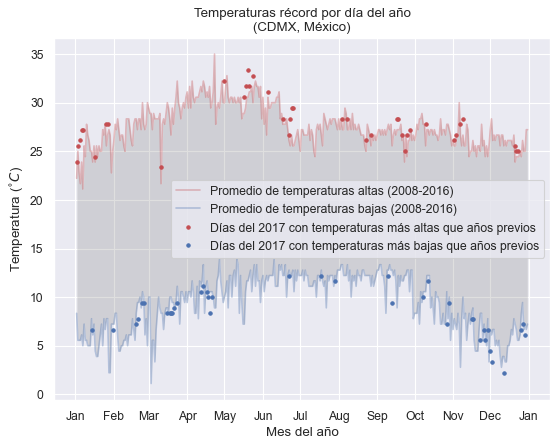

In [3]:
############################################################################################
plt.figure(figsize=(8,6),dpi=80)
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
x = pd.to_datetime(df.index, format='%m-%d', errors='coerce')

##############################################################################################
y_max = np.array(df['TMAX'])
y_min = np.array(df['TMIN'])
plt.plot(x,y_max,'-r',label='Promedio de temperaturas altas (2008-'+str(int(year)-1)+')',alpha=0.35)
plt.plot(x,y_min,'-b',label='Promedio de temperaturas bajas (2008-'+str(int(year)-1)+')',alpha=0.35)
plt.gca().fill_between(x,y_min,y_max,facecolor='grey',alpha=0.25)

# Only plot points where record was broken
bool_max = df_year['TMAX']>df['TMAX']
count1 = bool_max.sum()
x_max = pd.to_datetime(df_year[bool_max].index, format='%m-%d', errors='coerce')
y_max = np.array(df_year[bool_max]['TMAX'])

bool_min = df_year['TMIN']<df['TMIN']
count2 = bool_min.sum()
x_min = pd.to_datetime(df_year[bool_min].index, format='%m-%d', errors='coerce')
y_min = np.array(df_year[bool_min]['TMIN'])
plt.plot(x_max,y_max,'.r',label='Días del '+ year +' con temperaturas más altas que años previos')
plt.plot(x_min,y_min,'.b',label='Días del '+ year +' con temperaturas más bajas que años previos')

############################################################################################
plt.xlabel('Mes del año')
plt.ylabel('Temperatura ($^{\circ}C$)')
plt.title('Temperaturas récord por día del año\n(CDMX, México)')
plt.legend()
plt.savefig('cdmx_temperature.png')
plt.show()

In [4]:
print(f'En el 2017 hubo {count1} días más calurosos que el promedio de los nueve años previos.')
print(f'En el 2017 hubo {count2} días más fríos que el promedio de los nueve años previos.')

En el 2017 hubo 39 días más calurosos que el promedio de los nueve años previos.
En el 2017 hubo 39 días más fríos que el promedio de los nueve años previos.


In [5]:
diff_cold_index = (df['TMIN']-df_year['TMIN']).idxmax()
diff_cold = (df['TMIN']-df_year['TMIN']).max()
diff_hot_index = (df_year['TMAX']-df['TMAX']).idxmax()
diff_hot = (df_year['TMAX']-df['TMAX']).max()

In [6]:
print(f'En cuanto a temperaturas bajas, el mayor contraste entre el 2017 y años previos se dió el {diff_cold_index} y fue de {diff_cold} grados centígrados.')
print(f'En cuanto a temperaturas altas, el mayor contraste entre el 2017 y años previos se dió el {diff_hot_index} y fue de {diff_hot} grados centígrados.')

En cuanto a temperaturas bajas, el mayor contraste entre el 2017 y años previos se dió el 10-27 y fue de 3.333333333333333 grados centígrados.
En cuanto a temperaturas altas, el mayor contraste entre el 2017 y años previos se dió el 01-07 y fue de 6.111111111111111 grados centígrados.
